In [6]:
#---------------------------------
# ANALISE DE NORMALIDADE (FATORES QVAR)
# 2018 x 2019 
# ICOMP
#---------------------------------


# Limpa variaveis de ambiente
rm(list=ls())

# Ajusta diretorio de trabalho
setwd("/home/evoney/Documents/Pibic")


#---------------------------------
# Instalando librarys
#---------------------------------

#install.packages("rlang")
#install.packages("tidyverse", dependencies = TRUE)
library(ggplot2)
if(!require(ggthemes)){
  install.packages("ggthemes", dependencies = T)
  library(ggthemes)
}
## plota o grid dos boxplots
if(!require(cowplot)){
  install.packages("cowplot", dependencies = T)
  library(cowplot)
}
if(!require(ggplot2)){
   install.packages("ggplot2", dependencies = T)
   library(ggplot2)
}
if(!require(ggpubr)){
  install.packages("ggpubr", dependencies = T)
  library(ggpubr)
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: ggthemes
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggthemes’”also installing the dependencies ‘fontBitstreamVera’, ‘fontLiberation’, ‘systemfonts’, ‘gh’, ‘extrafontdb’, ‘Rttf2pt1’, ‘devtools’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘gdtools’, ‘usethis’, ‘extrafont’, ‘mapproj’, ‘pander’, ‘vdiffr’

Warning message in install.packages("ggthemes", dependencies = T):
“installation of package ‘gh’ had non-zero exit status”Warning message in install.packages("ggthemes", dependencies = T):
“installation of package ‘gdtools’ had non-zero exit status”Warning message in install.packages("ggthemes", dependencies = T):
“installation of package ‘usethis’ had non-zero exit status”Warning message in install.packages("ggthemes", dependencies = T

In [8]:
#Ler os dataframes com as respostas do qvar processadas
dfqvar18 = read.csv("processadaQVAr.2018.csv", header = TRUE, sep = ",", numerals = c("no.loss"), as.is = T)
dfqvar19 = read.csv("processadaQVAr.2019.csv", header = TRUE, sep = ",", numerals = c("no.loss"), as.is = T)
attach(dfqvar18)
attach(dfqvar19) 

The following objects are masked from dfqvar19 (pos = 8):

    Nome.completo, Q0, Q1, Q10, Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18,
    Q19, Q2, Q20, Q21, Q22, Q23, Q24, Q25, Q26, Q27, Q28, Q29, Q3, Q30,
    Q31, Q32, Q33, Q34, Q35, Q36, Q37, Q38, Q39, Q4, Q40, Q41, Q42,
    Q43, Q44, Q45, Q46, Q47, Q48, Q49, Q5, Q50, Q51, Q52, Q53, Q54,
    Q55, Q6, Q7, Q8, Q9

The following objects are masked from dfqvar18 (pos = 9):

    data, dia, Endereço.de.email, horário, Nome.completo, Q0, Q1, Q10,
    Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18, Q19, Q2, Q20, Q21, Q22,
    Q23, Q24, Q25, Q26, Q27, Q28, Q29, Q3, Q30, Q31, Q32, Q33, Q34,
    Q35, Q36, Q37, Q38, Q39, Q4, Q40, Q41, Q42, Q43, Q44, Q45, Q46,
    Q47, Q48, Q49, Q5, Q50, Q51, Q52, Q53, Q54, Q55, Q6, Q7, Q8, Q9

The following objects are masked from dfqvar19 (pos = 10):

    Nome.completo, Q0, Q1, Q10, Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18,
    Q19, Q2, Q20, Q21, Q22, Q23, Q24, Q25, Q26, Q27, Q28, Q29, Q3, Q30,
    Q31, Q32, Q33, Q34, Q35, 

[1] "O valor p para o teste de shapiro foi:  0,479975343023981"

[1] "O valor p para o teste de shapiro foi:  0,0513249789274522"

[1] "O valor p foi:  0,842807274512021"

[1] "O valor p foi:  0,324966106371649"

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

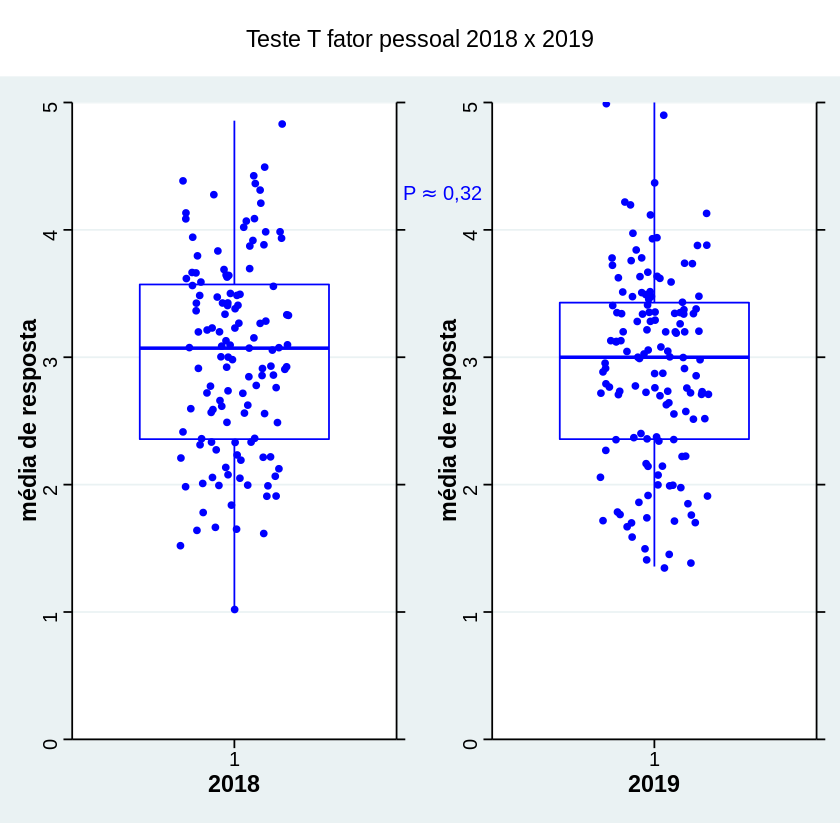

In [22]:
## TESTES PARA A MEDIA DE CADA FATOR DO QVAR

# FATOR PESSOAL 2018 x 2019
mediasPessoal2018 = data.frame(Means = rowMeans(dfqvar18[c("Q4","Q6","Q9","Q11","Q13","Q17","Q20","Q23","Q25","Q27","Q34","Q40","Q47","Q50")]))
vetorPessoal2018 = as.vector(mediasPessoal2018$Means)  

mediasPessoal2019 = data.frame(Means=rowMeans(dfqvar19[c("Q4","Q6","Q9","Q11","Q13","Q17","Q20","Q23","Q25","Q27","Q34","Q40","Q47","Q50")]))
vetorPessoal2019 = as.vector(mediasPessoal2019$Means)  

# TESTE DE NORMALIDADE (SHAPIRO WILK)´
testePessoal2018 = shapiro.test(mediasPessoal2018$Means)
paste("O valor p para o teste de shapiro foi: ", testePessoal2018$p.value);
cat()
testePessoal2019 = shapiro.test(mediasPessoal2019$Means)
paste("O valor p para o teste de shapiro foi: ", testePessoal2019$p.value);
cat()

# TESTE (CASO A NORMALIDADE SEJA INDICADA)
vartestePessoal = var.test(vetorPessoal2018, vetorPessoal2019, ratio = 1, alternative = "two.sided", conf.level = 0.95)
paste("O valor p foi: ", vartestePessoal$p.value);
cat()

tPessoal = t.test(vetorPessoal2018, vetorPessoal2019, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = T, conf.level = 0.95)
pPessoal = tPessoal$p.value
paste("O valor p foi: ",pPessoal);
cat()

# PLOTS
p = ggboxplot(vetorPessoal2018, color = "blue", add = "jitter") + ylab('média de resposta') + 
  xlab('2018') + 
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 
p2 = ggboxplot(vetorPessoal2019, color = "blue", add = "jitter") + ylab('média de resposta') + 
  xlab('2019') +
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 

label <- substitute(paste("P","" %~~% "", pPessoal), list(pPessoal = round(pPessoal, 2)))
plot_row = plot_grid(p + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14, face="bold")),
          p2 + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                         axis.title=element_text(size=14, face="bold")))


p3 = ggdraw(add_sub(plot_row, label, size = 12, vpadding=grid::unit(0, "lines"),
               y = 38, x = 0.48, hjust = 0, fontface = "bold", color = "blue"))

title <- ggdraw() + draw_label("Teste T fator pessoal 2018 x 2019")
plot_grid(title, p3, ncol=1, rel_heights=c(0.1, 1))


[1] "O valor p para o teste de shapiro foi:  0,0088067638703048"

[1] "O valor p para o teste de shapiro foi:  0,0869818333622924"

[1] "O valor p foi:  0,447692094925385"

[1] "O valor p foi:  0,587303726264774"

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

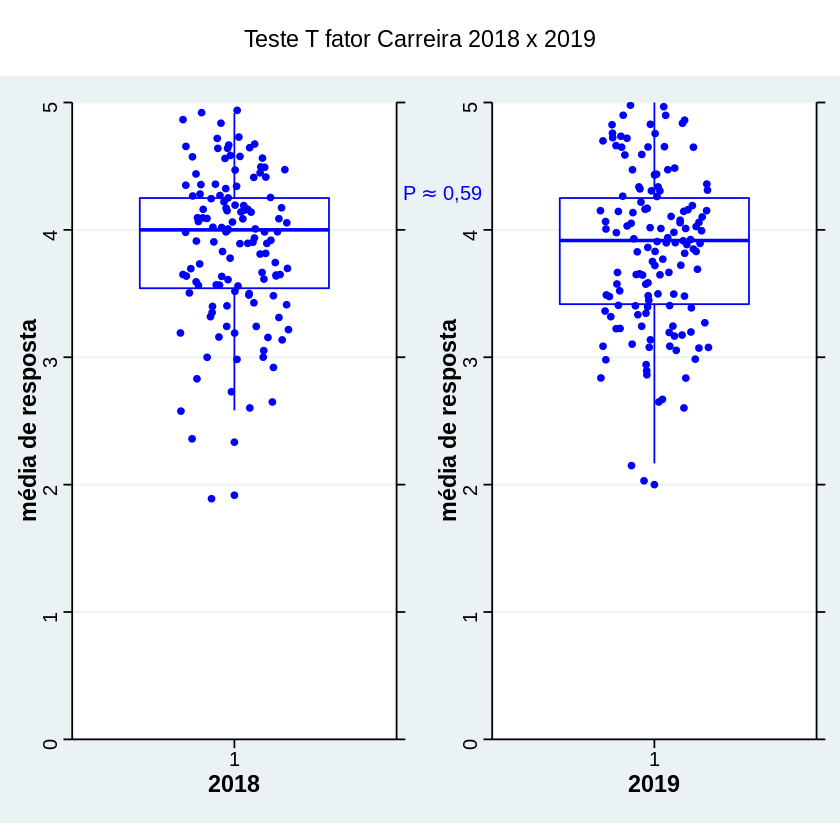

In [21]:
# FATOR CARREIRA 2018 x 2019
mediasCarreira2018 = data.frame(Means = rowMeans(dfqvar18[c("Q2","Q5","Q7","Q8","Q14","Q19","Q21","Q32","Q46","Q49","Q51","Q55")]))
vetorCarreira2018 = as.vector(mediasCarreira2018$Means)  

mediasCarreira2019 = data.frame(Means=rowMeans(dfqvar19[c("Q2","Q5","Q7","Q8","Q14","Q19","Q21","Q32","Q46","Q49","Q51","Q55")]))
vetorCarreira2019 = as.vector(mediasCarreira2019$Means)  

# TESTE DE NORMALIDADE (SHAPIRO WILK)´
testeCarreira2018 = shapiro.test(mediasCarreira2018$Means)
paste("O valor p para o teste de shapiro foi: ", testeCarreira2018$p.value);
cat()
testeCarreira2019 = shapiro.test(mediasCarreira2019$Means)
paste("O valor p para o teste de shapiro foi: ", testeCarreira2019$p.value);
cat()

# TESTE (CASO A NORMALIDADE SEJA INDICADA)
vartesteCarreira = var.test(vetorCarreira2018, vetorCarreira2019, ratio = 1, alternative = "two.sided", conf.level = 0.95)
paste("O valor p foi: ", vartesteCarreira$p.value);
cat()

tCarreira = t.test(vetorCarreira2018, vetorCarreira2019, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = T, conf.level = 0.95)
pCarreira = tCarreira$p.value
paste("O valor p foi: ",pCarreira);
cat() 

# PLOTS
p = ggboxplot(vetorCarreira2018, color = "blue", add = "jitter") + ylab('média de resposta') + 
  xlab('2018') + 
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 
p2 = ggboxplot(vetorCarreira2019, color = "blue", add = "jitter") + ylab('média de resposta') + 
  xlab('2019') +
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 

label <- substitute(paste("P","" %~~% "", pCarreira), list(pCarreira = round(pCarreira, 2)))
plot_row = plot_grid(p + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                     axis.title=element_text(size=14,face="bold")),
                     p2 + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                      axis.title=element_text(size=14,face="bold")), label_size = 30, label_fontface = 'bold')


p3 = ggdraw(add_sub(plot_row, label, size = 12, vpadding=grid::unit(0, "lines"),
                    y = 38, x = 0.48, hjust = 0, fontface = "bold", color = "blue"))

title <- ggdraw() + draw_label("Teste T fator Carreira 2018 x 2019")
plot_grid(title, p3, ncol=1, rel_heights=c(0.1, 1))


[1] "O valor p para o teste de shapiro foi:  0,181870596869113"

[1] "O valor p para o teste de shapiro foi:  0,00640976534727211"

[1] "O valor p para o teste de variância foi:  0,75970733157816"

[1] "O valor p para o teste t foi:  0,262627960350318"

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

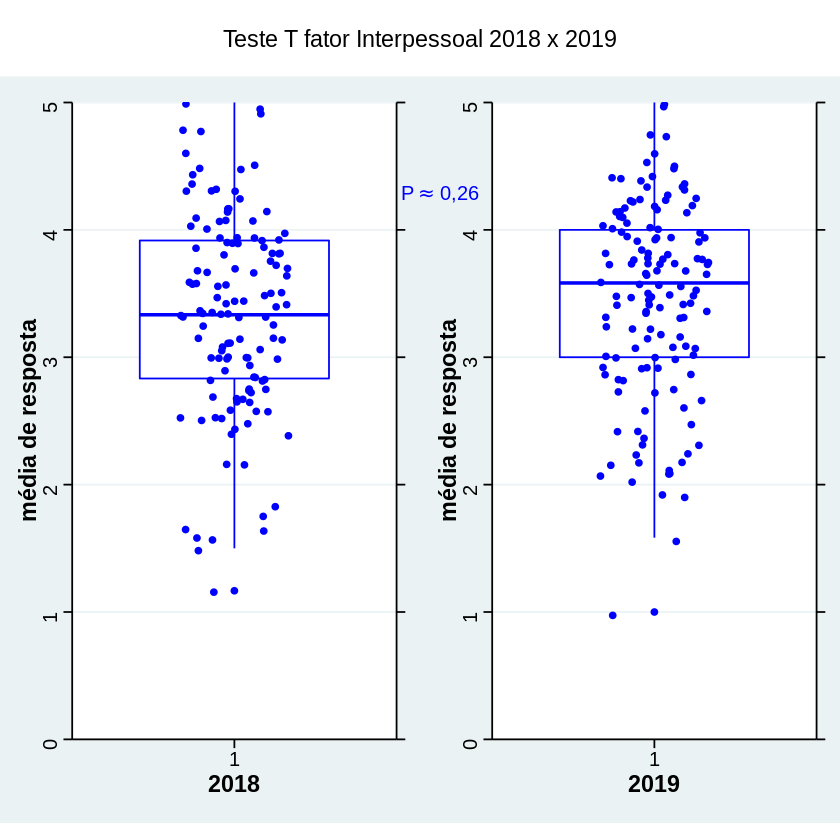

In [24]:
# FATOR INTERPESSOAL 2018 x 2019
mediasInterpessoal2018 = data.frame(Means = rowMeans(dfqvar18[c("Q1","Q18","Q22","Q24","Q26","Q29","Q31","Q33","Q35","Q37","Q38","Q54")]))
vetorInterpessoal2018 = as.vector(mediasInterpessoal2018$Means)  

mediasInterpessoal2019 = data.frame(Means=rowMeans(dfqvar19[c("Q1","Q18","Q22","Q24","Q26","Q29","Q31","Q33","Q35","Q37","Q38","Q54")]))
vetorInterpessoal2019 = as.vector(mediasInterpessoal2019$Means)  

# TESTE DE NORMALIDADE (SHAPIRO WILK)´
testeInterpessoal2018 = shapiro.test(mediasInterpessoal2018$Means)
paste("O valor p para o teste de shapiro foi: ", testeInterpessoal2018$p.value);
cat()
testeInterpessoal2019 = shapiro.test(mediasInterpessoal2019$Means)
paste("O valor p para o teste de shapiro foi: ", testeInterpessoal2019$p.value);
cat()

# TESTE (CASO A NORMALIDADE SEJA INDICADA)
vartesteInterpessoal = var.test(vetorInterpessoal2018, vetorInterpessoal2019, ratio = 1, alternative = "two.sided", conf.level = 0.95)
paste("O valor p para o teste de variância foi: ", vartesteInterpessoal$p.value);
cat()

tInterpessoal = t.test(vetorInterpessoal2018, vetorInterpessoal2019, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = T, conf.level = 0.95)
pInterpessoal = tInterpessoal$p.value
paste("O valor p para o teste t foi: ",pInterpessoal);
cat()  

# PLOTS
p = ggboxplot(vetorInterpessoal2018, color = "blue", add = "jitter") + ylab('média de resposta') + 
  xlab('2018') + 
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 
p2 = ggboxplot(vetorInterpessoal2019, color = "blue", add = "jitter") + ylab('média de resposta') +
  xlab('2019') +
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 

label <- substitute(paste("P","" %~~% "", pInterpessoal), list(pInterpessoal = round(pInterpessoal, 2)))
plot_row = plot_grid(p + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                     axis.title=element_text(size=14,face="bold")),
                     p2 + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                      axis.title=element_text(size=14,face="bold")), label_size = 30, label_fontface = 'bold')


p3 = ggdraw(add_sub(plot_row, label, size = 12, vpadding=grid::unit(0, "lines"),
                    y = 38, x = 0.477, hjust = 0, fontface = "bold", color = "blue"))

title <- ggdraw() + draw_label("Teste T fator Interpessoal 2018 x 2019")
plot_grid(title, p3, ncol=1, rel_heights=c(0.1, 1))


[1] "O valor p para o teste de shapiro foi:  0,665982033025232"

[1] "O valor p para o teste de shapiro foi:  0,686715102622689"

[1] "O valor p para o teste de variância foi:  0,293839527798926"

[1] "O valor p para o teste t foi:  0,730350565097486"

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

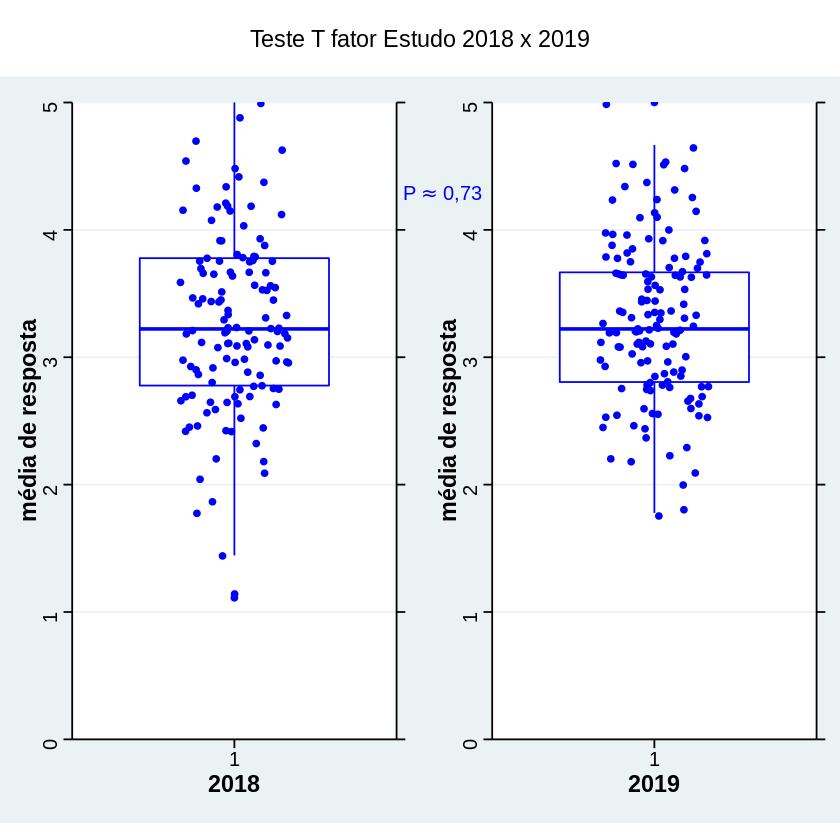

In [26]:
# FATOR ESTUDO 2018 x 2019
mediasEstudo2018 = data.frame(Means = rowMeans(dfqvar18[c("Q10","Q28","Q30","Q36","Q39","Q42","Q44","Q48","Q52")]))
vetorEstudo2018 = as.vector(mediasEstudo2018$Means)  

mediasEstudo2019 = data.frame(Means=rowMeans(dfqvar19[c("Q10","Q28","Q30","Q36","Q39","Q42","Q44","Q48","Q52")]))
vetorEstudo2019 = as.vector(mediasEstudo2019$Means)  

# TESTE DE NORMALIDADE (SHAPIRO WILK)´
testeEstudo2018 = shapiro.test(mediasEstudo2018$Means)
paste("O valor p para o teste de shapiro foi: ", testeEstudo2018$p.value);
cat()
testeEstudo2019 = shapiro.test(mediasEstudo2019$Means)
paste("O valor p para o teste de shapiro foi: ", testeEstudo2019$p.value);
cat()

# TESTE (CASO A NORMALIDADE SEJA INDICADA)
vartesteEstudo = var.test(vetorEstudo2018, vetorEstudo2019, ratio = 1, alternative = "two.sided", conf.level = 0.95)
paste("O valor p para o teste de variância foi: ", vartesteEstudo$p.value);
cat()

tEstudo = t.test(vetorEstudo2018, vetorEstudo2019, alternative = "two.sided" ,mu = 0, paired = FALSE, var.equal = T, conf.level = 0.95)
pEstudo = tEstudo$p.value
paste("O valor p para o teste t foi: ",pEstudo);
cat()  

# PLOTS
p = ggboxplot(vetorEstudo2018, color = "blue", add = "jitter") + ylab('média de resposta') + 
  xlab('2018') + 
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 
p2 = ggboxplot(vetorEstudo2019, color = "blue", add = "jitter") + ylab('média de resposta') +
  xlab('2019') +
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 

label <- substitute(paste("P","" %~~% "", pEstudo), list(pEstudo = round(pEstudo, 2)))
plot_row = plot_grid(p + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                     axis.title=element_text(size=14,face="bold")),
                     p2 + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                      axis.title=element_text(size=14,face="bold")), label_size = 30, label_fontface = 'bold')


p3 = ggdraw(add_sub(plot_row, label, size = 12, vpadding=grid::unit(0, "lines"),
                    y = 38, x = 0.48, hjust = 0, fontface = "bold", color = "blue"))

title <- ggdraw() + draw_label("Teste T fator Estudo 2018 x 2019")
plot_grid(title, p3, ncol=1, rel_heights=c(0.1, 1))


[1] "O valor p para o teste de shapiro foi:  0,000250714575653852"

[1] "O valor p para o teste de shapiro foi:  0,0318535359961025"

[1] "O valor p para o teste de Mann Whitney Wilcoxon foi:  0,0366406145052651"

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

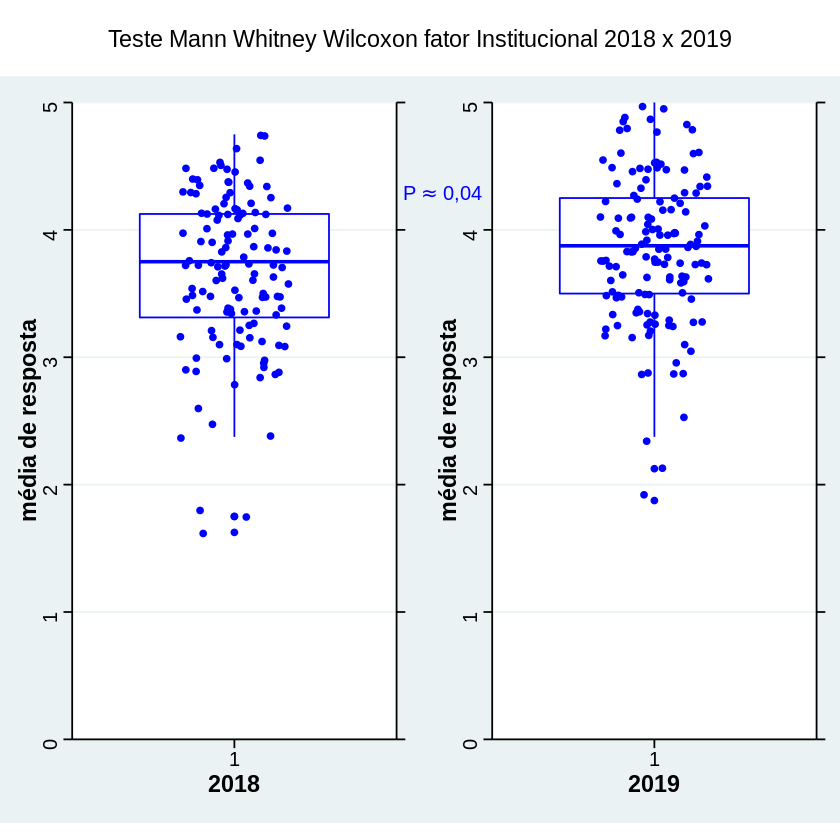

In [27]:
# FATOR INSTITUCIONAL 2018 x 2019
mediasInstitucional2018 = data.frame(Means = rowMeans(dfqvar18[c("Q3","Q12","Q15","Q16","Q41","Q43","Q45","Q53")]))
vetorInstitucional2018 = as.vector(mediasInstitucional2018$Means)  

mediasInstitucional2019 = data.frame(Means=rowMeans(dfqvar19[c("Q3","Q12","Q15","Q16","Q41","Q43","Q45","Q53")]))
vetorInstitucional2019 = as.vector(mediasInstitucional2019$Means)  

# TESTE DE NORMALIDADE (SHAPIRO WILK)´
testeInstitucional2018 = shapiro.test(mediasInstitucional2018$Means)
paste("O valor p para o teste de shapiro foi: ", testeInstitucional2018$p.value);
cat()
testeInstitucional2019 = shapiro.test(mediasInstitucional2019$Means)
paste("O valor p para o teste de shapiro foi: ", testeInstitucional2019$p.value);
cat()

# TESTE MANN WHITNEY WILCOXON (NÃO NORMAIS)wilcox.test(y1,y2,paired=TRUE) 

wInstitucional = wilcox.test(vetorInstitucional2018, vetorInstitucional2019)
pInstitucional = wInstitucional$p.value
paste("O valor p para o teste de Mann Whitney Wilcoxon foi: ",pInstitucional);
cat()  

# PLOTS
p = ggboxplot(vetorInstitucional2018, color = "blue", add = "jitter") + ylab('média de resposta') + 
  xlab('2018') + 
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 
p2 = ggboxplot(vetorInstitucional2019, color = "blue", add = "jitter") + ylab('média de resposta') +
  xlab('2019') +
  scale_y_continuous(sec.axis = dup_axis(label = NULL, 
                                         name = NULL),
                     expand = expand_scale(mult = c(0, 0)),
                     breaks = pretty(c(0, 5), n = 5), 
                     limits = c(0,5)) 

label <- substitute(paste("P","" %~~% "", pInstitucional), list(pInstitucional = round(pInstitucional, 2)))
plot_row = plot_grid(p + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                     axis.title=element_text(size=14,face="bold")),
                     p2 + theme_stata() + scale_color_stata() + theme(axis.text=element_text(size=12),
                                                                      axis.title=element_text(size=14,face="bold")), label_size = 30, label_fontface = 'bold')


p3 = ggdraw(add_sub(plot_row, label, size = 12, vpadding=grid::unit(0, "lines"),
                    y = 38, x = 0.48, hjust = 0, fontface = "bold", color = "blue"))

title <- ggdraw() + draw_label("Teste Mann Whitney Wilcoxon fator Institucional 2018 x 2019")
plot_grid(title, p3, ncol=1, rel_heights=c(0.1, 1))